# DataFrame 4: Muertes por episodio I
Lista episodios

Muertes????

In [2]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
# sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_muertes_epi1 = pd.read_csv('../data/muertes_x_episodio1.csv')
df_muertes_epi1

,index,game-of-thones-deaths,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
1,1,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
2,2,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
3,3,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
4,4,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
...,...,...,...,...,...,...,...,...,...,...
2220,2220,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,2221,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,2222,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2223,2223,NaN,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [4]:
df_muertes_epi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  2225 non-null   int64 
 1   game-of-thones-deaths  1793 non-null   object
 2   Unnamed: 1             2225 non-null   object
 3   Unnamed: 2             2225 non-null   object
 4   Unnamed: 3             2215 non-null   object
 5   Unnamed: 4             2195 non-null   object
 6   Unnamed: 5             2225 non-null   object
 7   Unnamed: 6             2225 non-null   object
 8   Unnamed: 7             2225 non-null   object
 9   Unnamed: 8             2225 non-null   object
dtypes: int64(1), object(9)
memory usage: 174.0+ KB


In [5]:
#CAMBIAR NOMBRES COLUMNAS POR 1º REGISTROS

# Reemplazar los nombres de las columnas desde la posición 2 en adelante con los valores de la primera fila
df_muertes_epi1.columns = list(df_muertes_epi1.columns[:2]) + list(df_muertes_epi1.iloc[0, 2:])

# Eliminar la primera fila (ya que la usamos como cabecera)
df_muertes_epi1 = df_muertes_epi1[1:]

# Reiniciar el índice si lo deseas
df_muertes_epi1 = df_muertes_epi1.reset_index(drop=True)
df_muertes_epi1


,index,game-of-thones-deaths,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,1,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,2,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,3,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,4,NaN,4,1,Direwolf,NaN,Winterfell,Teeth,Stag,1
4,5,NaN,5,1,Stag,NaN,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...,...,...
2219,2220,NaN,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,2221,NaN,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,2222,NaN,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,2223,NaN,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [6]:
df_muertes_epi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  2224 non-null   int64 
 1   game-of-thones-deaths  1792 non-null   object
 2   Death No.              2224 non-null   object
 3   Episode                2224 non-null   object
 4   Killer                 2214 non-null   object
 5   Killers House          2194 non-null   object
 6   Location               2224 non-null   object
 7   Method                 2224 non-null   object
 8   Name                   2224 non-null   object
 9   Season                 2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


In [7]:
df_muertes_epi1["Name"].nunique

<bound method IndexOpsMixin.nunique of 0                 Waymar Royce
1                        Gared
2                         Will
3                         Stag
4                     Direwolf
                 ...          
2219    King's Landing Citizen
2220    King's Landing Citizen
2221    King's Landing Citizen
2222    King's Landing Citizen
2223        Daenerys Targaryen
Name: Name, Length: 2224, dtype: object>

In [8]:
list(df_muertes_epi1['Name'].unique())

['Waymar Royce',
 'Gared',
 'Will',
 'Stag',
 'Direwolf',
 'Jon Arryn',
 'Dothraki man',
 'Catspaw assassin',
 'Mycah',
 'Lady',
 'Ser Hugh of the Vale',
 "Clegane's horse",
 'Stark soldier',
 'Tribesman',
 'Lannister soldier',
 'Jory Cassel',
 'Wallen',
 'Wildling',
 'Stiv',
 'Vardis Egen',
 'Viserys Targaryen',
 'Robert Baratheon',
 'Vayon Poole',
 'Stark staff member',
 'Septa Mordane',
 'Syrio Forel',
 'Stableboy',
 'Othor',
 'Jafer Flowers',
 'Mago',
 "Drogo's horse",
 'Qotho',
 'Pigeon',
 'Ned Stark',
 'Rhaego',
 'Khal Drogo',
 'Mirri Maz Duur',
 'Knight',
 'The Silver',
 'Maester Cressen',
 'Barra (Baratheon illegitimate son)',
 "Robert Baratheon's illegitimate son",
 'Rakharo',
 'Yoren',
 "Night's Watch recruit",
 'Lommy Greenhands',
 'Rennick',
 'Prisoner',
 'Renly Baratheon',
 "Baratheon of Storm's End guard",
 'The Tickler',
 'Rodrik Cassel',
 'High Septon',
 'Peasant',
 'Amory Lorch',
 'Drennan',
 'Irri',
 'Alton Lannister',
 'Torrhen Karstark',
 'The Spice King',
 'The Sil

In [9]:
secundarios = ['Golden Company soldier','Golden Company horse', "King's Landing Citizen",
               'Unsullied','Undead Polar Bear', 'Greyjoy Soldier','Frey family member',
               "King's Landing Noble", 'Stark Soldier', 'The Masters Soldier','Meereen citizen',
               'Faith Militant Brother','Brotherhood Without Banners Member', 'Gladiator','Horse',
               'Stone Man', 'Unsullied Soldier', 'Second Sun Mercenary','Dorne Smuggler','Dorne Horse',
               'Dorne Soldier','Snake', 'Rat','Meereen slave','Sons of the Harpy agent','Unamed Dwarf',
               'Baelish soldier', 'Greyjoy soldier', "Night's Watch brother","Night's Watch mutineer",
               'Meereen slave master','Champion of Meereen',"Champion of Meereen's Horse",'Deer','Dragonstone citizen',
                'Unborn Stark child','Yunkai soldier','Horse breeder','White Walker','Astapor slaver',
                'Bolton soldier',"Baratheon of King's Landing soldier",'Baratheon of Dragonstone soldier',
                'Member of the Thirteen',"Baratheon of Storm's End guard",'Prisoner',"Night's Watch recruit",
                "Drogo's horse",'Stark staff member', 'Stableboy',"Olly's mum",'Wildling','Lannister soldier',
                'Tribesman','Stark soldier',"Clegane's horse",'Lady','Dothraki man','Direwolf','Stag']

In [10]:
df_muertes_epi1_clean = df_muertes_epi1[~df_muertes_epi1['Name'].isin(secundarios)]
df_muertes_epi1_clean


,index,game-of-thones-deaths,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,1,Night's Watch,1,1,White Walker,NaN,Beyond the Wall,Ice sword,Waymar Royce,1
1,2,Night's Watch,2,1,White Walker,NaN,Beyond the Wall,Ice sword,Gared,1
2,3,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
5,6,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1
7,8,NaN,8,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1
8,9,Smallfolk,9,2,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,1
10,11,House Arryn,11,4,"Gregor ""the Mountain"" Clegane",House Lannister,King's Landing,Spear,Ser Hugh of the Vale,1
27,28,House Stark,28,5,Jaime Lannister,House Lannister,King's Landing,Knife,Jory Cassel,1
28,29,Free Folk,29,6,Robb Stark,House Stark,Winterfell,Sword,Wallen,1
30,31,Free Folk,31,6,Theon Greyjoy,House Bolton,Winterfell,Arrow,Stiv,1


In [11]:
df_muertes_epi1_clean.to_csv("../data_clean/df_muertes_epi1_clean.csv", index=False)

In [12]:
df_muertes_epi1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  267 non-null    int64 
 1   game-of-thones-deaths  247 non-null    object
 2   Death No.              267 non-null    object
 3   Episode                267 non-null    object
 4   Killer                 264 non-null    object
 5   Killers House          257 non-null    object
 6   Location               267 non-null    object
 7   Method                 267 non-null    object
 8   Name                   267 non-null    object
 9   Season                 267 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.9+ KB


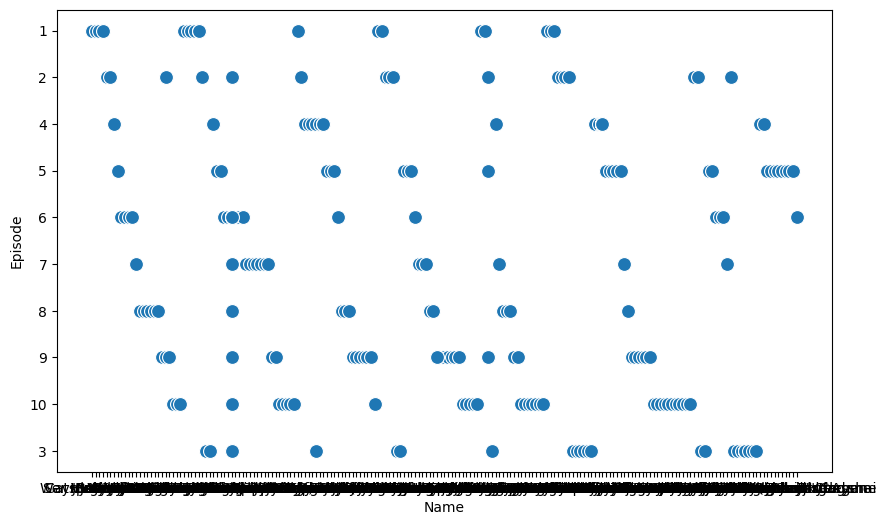

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_muertes_epi1_clean["Name"],
                y=df_muertes_epi1_clean['Episode'],
               s=100);

Muertes por temporada

In [14]:
GOTcolors = [
    "#1C1C1C",  # Negro (Noche / Guardia de la Noche)
    "#8B0000",  # Rojo oscuro (Casa Baratheon)
    "#4682B4",  # Azul acero (Casa Stark, invierno)
    "#DAA520",  # Dorado (Casa Lannister)
    "#708090",  # Gris pizarra (Hierro / Casa Greyjoy)
    "#013220",  # Verde oscuro (Casa Tyrell / naturaleza)
    #"#E0FFFF",  # Azul hielo (Caminantes Blancos / Invierno)
    #"#FFFAF0",  # Blanco roto (verano, desierto / Daenerys)
    "#2F4F4F",  # Gris oscuro (batallas, oscuridad)
    "#A52A2A"   # Marrón rojizo (sangre, tierra)
]

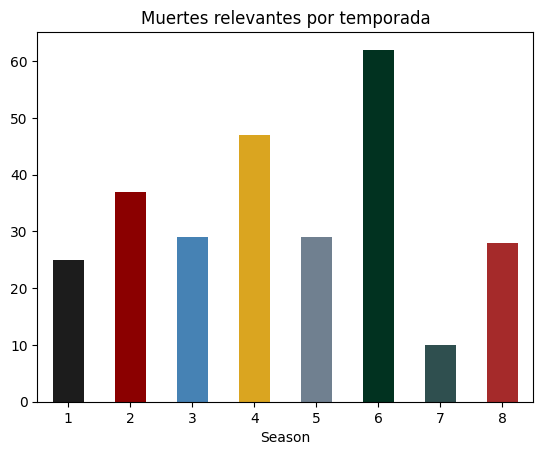

In [15]:
num_barras = len(df_muertes_epi1_clean['Season'].value_counts())

df_muertes_epi1_clean['Season'].value_counts().sort_index().plot(
    kind='bar', 
    title='Muertes relevantes por temporada',
    color=GOTcolors[:num_barras])
plt.xticks(rotation=0);

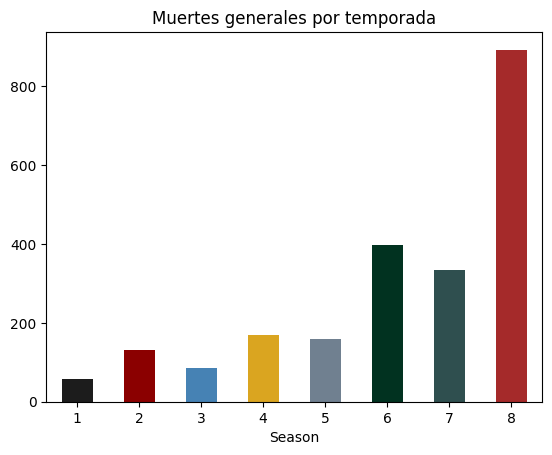

In [16]:
num_barras = len(df_muertes_epi1['Season'].value_counts())

df_muertes_epi1['Season'].value_counts().sort_index().plot(
    kind='bar', 
    title='Muertes generales por temporada',
    color=GOTcolors[:num_barras])
plt.xticks(rotation=0)
plt.show()

Top asesinos

<Axes: title={'center': 'Top 10 asesinos (relevantes)'}, ylabel='Killer'>

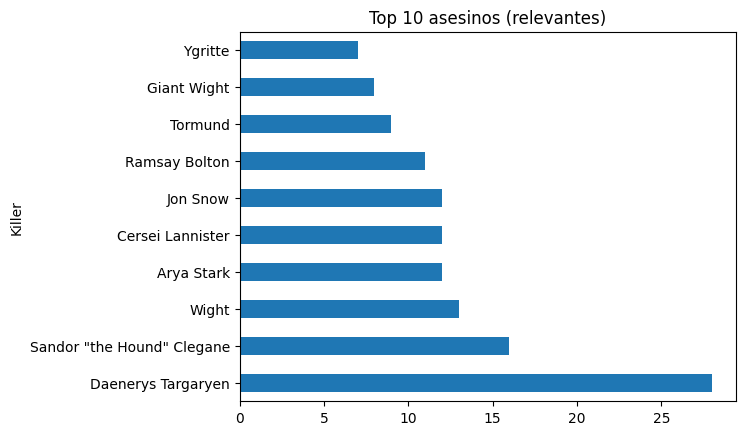

In [17]:
df_muertes_epi1_clean['Killer'].value_counts().head(10).plot(kind='barh', title='Top 10 asesinos (relevantes)')


<Axes: title={'center': 'Top 10 asesinos general'}, ylabel='Killer'>

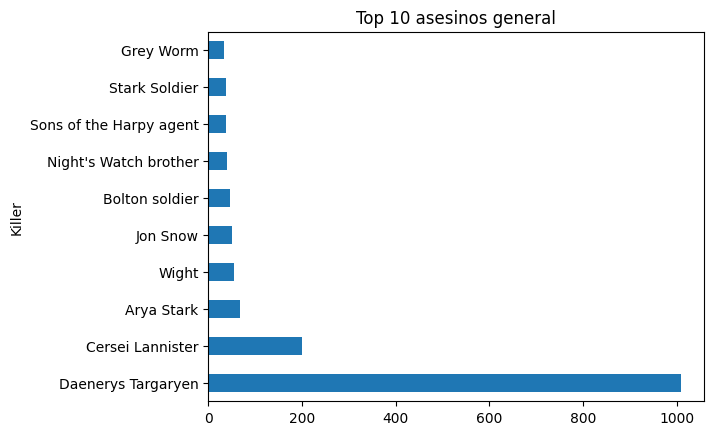

In [18]:
df_muertes_epi1['Killer'].value_counts().head(10).plot(kind='barh', title='Top 10 asesinos general')


Casas más letales

<Axes: title={'center': 'Muertes por casa del asesino'}, xlabel='Killers House'>

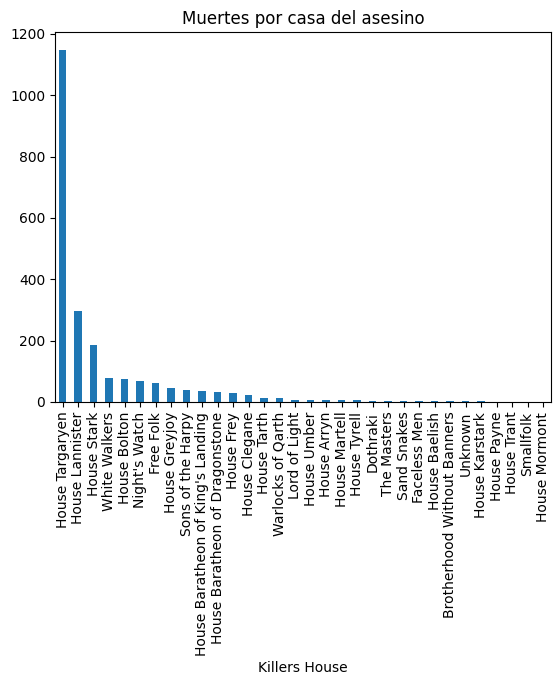

In [19]:
df_muertes_epi1['Killers House'].value_counts().plot(kind='bar', title='Muertes por casa del asesino')


Métodos de asesinato más comunes

<Axes: title={'center': 'Métodos de asesinato más frecuentes'}, xlabel='Method'>

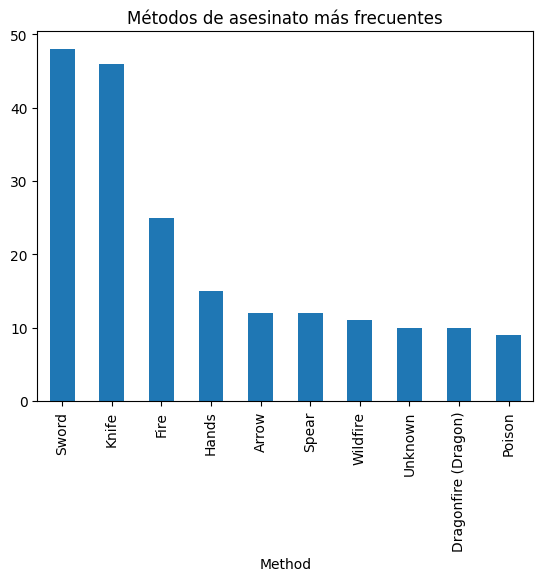

In [20]:
df_muertes_epi1_clean['Method'].value_counts().head(10).plot(kind='bar', title='Métodos de asesinato más frecuentes')


<Axes: title={'center': 'Métodos de asesinato más frecuentes (general)'}, xlabel='Method'>

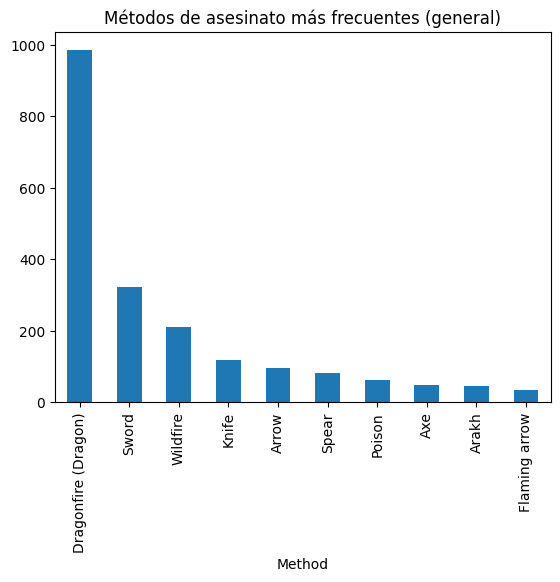

In [21]:
df_muertes_epi1['Method'].value_counts().head(10).plot(kind='bar', title='Métodos de asesinato más frecuentes (general)')


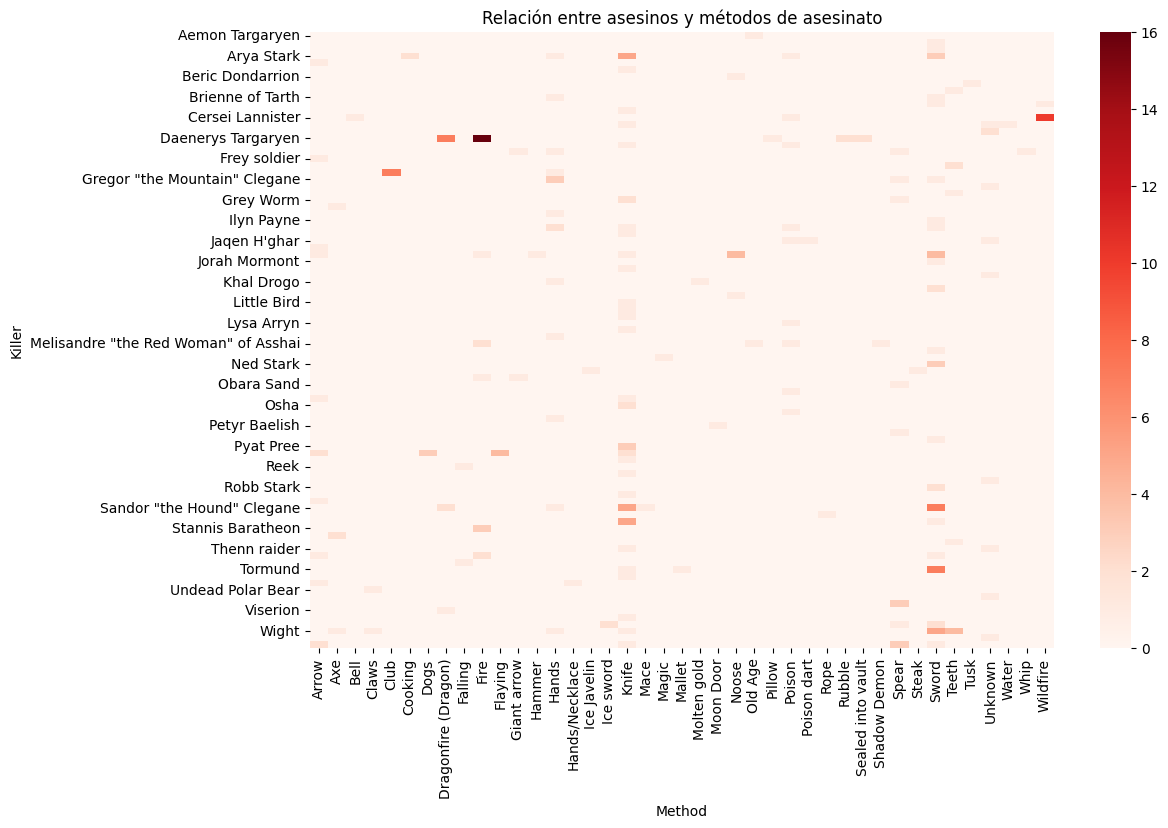

In [22]:

tabla = pd.crosstab(df_muertes_epi1_clean['Killer'], df_muertes_epi1_clean['Method'])
plt.figure(figsize=(12, 8))
sns.heatmap(tabla, cmap='Reds')
plt.title('Relación entre asesinos y métodos de asesinato')
plt.show()